# Taller 1
## Isaac Arias, Bastian Alvarez

#### Funciones de verificacion para bibliotecas
Estas funciones son cuando no se encuentran instaladas las bibliotecas
y se instalan automaticamente


In [ ]:
def verificacionPanda():
    try:
        import pandas as pd
        import openpyxl as op
    except ImportError:
        import subprocess
        import sys
        print(" pandas no está instalado. Instalando Pandas, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas"])
        subprocess.check_call([sys.executable,"pip", "install", "openpyxl"])
        print(" pandas instalado correctamente.")



def verificacionNumpy():
    try:
        import numpy as np
    except ImportError:
        import subprocess
        import sys
        print(" numpy no está instalado. Instalando Numpy, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy"])
        import numpy as np
        print(" numpy instalado correctamente.")

def verificacionMatplotlib():
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        import subprocess
        import sys
        print("matplotlib no está instalado. Instalando matplotlib, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
        print(" matplotlib instalado correctamente.")

def verificacionScikitLearn():
    try:
        from sklearn.preprocessing import MinMaxScaler
        from sklearn.cluster import KMeans
    except ImportError:
        import subprocess
        import sys
        print(" scikit-learn no está instalado. Instalando scikit-learn, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-learn"])
        print(" scikit-learn instalado correctamente.")


def verificacionSeaborn():
    try:
        import seaborn as sns
    except ImportError:
        import subprocess
        import sys
        print(" seaborn no está instalado. Instalando seaborn, espere un momento...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])
        print(" seaborn instalado correctamente.")



def importacionDeBibliotecasAutomaticas():
    verificacionPanda()
    verificacionNumpy()
    verificacionMatplotlib()
    verificacionScikitLearn()
    verificacionSeaborn()
importacionDeBibliotecasAutomaticas()

### Si tiene las depencencias instaladas ejecutar el codigo a continuacion


Este codigo es solo para separar los archivos e importaciones,
se toma por obiedad que los archivos csv y xlsx estaran en el mismo directorio que el archivo ipynb

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#se usa bravo como "B", charlie como "C" y delta como "D"
#archivos de codigos
archCodeDelta_Hoja1= pd.read_excel('Libro_CódigosADM2025_ArchivoD.xlsx', sheet_name="Postulación y Selección")
archCodeDelta_Hoja3= pd.read_excel('Libro_CódigosADM2025_ArchivoD.xlsx', sheet_name="Anexo -  Oferta académica")
archCodeCharlie_Hoja1= pd.read_excel('Libro_CódigosADM2025_ArchivoC.xlsx', sheet_name="Rinden")

#archivos de informacion importante
archBravo = 'ArchivoB_Adm2025.csv'
archDelta = 'ArchivoD_Adm2025.csv'
archCharlie = 'ArchivoC_Adm2025.csv'





datosBravo = pd.read_csv(archBravo,sep=";")
datosDelta = pd.read_csv(archDelta,sep=";")
datosCharlie = pd.read_csv(archCharlie,sep=";", low_memory=False)



### Actividad 1: Descripción del set de datos

En esta primera parte del taller se integraron los archivos B, C y D en un solo conjunto de datos utilizando `ID_aux` como clave principal.  
Luego, se filtró para mantener solo una postulación por estudiante (preferencia número 1).  

Se realizó el análisis exploratorio de variables:
- **Numérica:** `PTJE_NEM`, donde se observó su rango y dispersión.
- **Nominal:** `NOMBRE_UNIVERSIDAD`, representada gráficamente por distribución de postulaciones.
- **Ordinal:** `SITUACION_EGRESO_y`, que fue mapeada con etiquetas explicativas para su análisis con `countplot`.

Este análisis permitió conocer la composición general del dataset y características relevantes para los análisis posteriores.


In [4]:
datosBC = pd.merge(datosBravo,datosCharlie,on="ID_aux",how="left")
datosUnidos = pd.merge(datosBC,datosDelta,on="ID_aux",how="left")
datosUnidos.head()

# Primero nos aseguramos que ORDEN_PREF sea numérico
datosUnidos['ORDEN_PREF'] = pd.to_numeric(datosUnidos['ORDEN_PREF'], errors='coerce')

# Ahora seleccionamos la postulación de menor ORDEN_PREF (es decir, preferencia 1 si existe)
datosUnidos_filtrado = datosUnidos.sort_values(by=['ID_aux', 'ORDEN_PREF']).drop_duplicates(subset='ID_aux', keep='first')

# Mostrar resultado
datosUnidos_filtrado.head()

,ID_aux,ANYO_PROCESO,FECHA_NACIMIENTO,RBD_x,COD_ENS_x,REGIMEN,RAMA_EDUCACIONAL_x,GRUPO_DEPENDENCIA_x,ANYO_EGRESO,CODIGO_REGION_x,...,MATE1_INV_ANTERIOR,MATE2_INV_ANTERIOR,HCSOC_INV_ANTERIOR,CIEN_INV_ANTERIOR,MODULO_INV_ANTERIOR,ORDEN_PREF,COD_CARRERA_PREF,ESTADO_PREF,TIPO_PREF,PTJE_PREF
776917,id_.5+85.57e+83,2025,122005,8854.0,310.0,3.0,H1,2.0,2024.0,13.0,...,NaN,NaN,NaN,NaN,NaN,1.0,50929.0,25.0,REGULAR,"603,5"
1175363,id_0001900670126,2025,111994,12603.0,610.0,3.0,T3,2.0,2012.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1825174,id_0001900670170,2025,121994,40320.0,310.0,3.0,H1,2.0,2012.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,44019.0,25.0,REGULAR,"832,9"
1761187,id_0002900270295,2025,41994,30003.0,310.0,3.0,H1,2.0,2011.0,15.0,...,NaN,NaN,NaN,NaN,NaN,1.0,22023.0,24.0,REGULAR,"702,1"
344173,id_0002900470298,2025,91989,3317.0,363.0,3.0,H2,3.0,2024.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Variables numericas

min:  0.0
max:  1000.0
media:  522.106
desv estand:  268.488


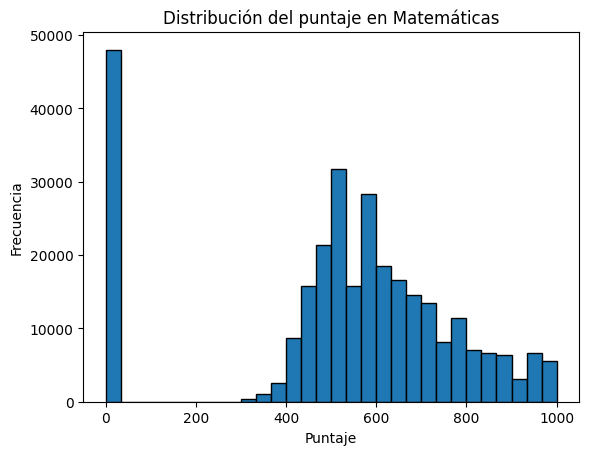

In [5]:
varNumerica = datosUnidos_filtrado["MATE1_REG_ACTUAL"]
print("min: " , varNumerica.min())
print("max: ", varNumerica.max())
print("media: ", round(varNumerica.mean(),3))
print("desv estand: ", round(varNumerica.std(),3) )


# Histograma
plt.hist(varNumerica, bins=30, edgecolor='black')
plt.title('Distribución del puntaje en Matemáticas')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

#### Variables Nominal

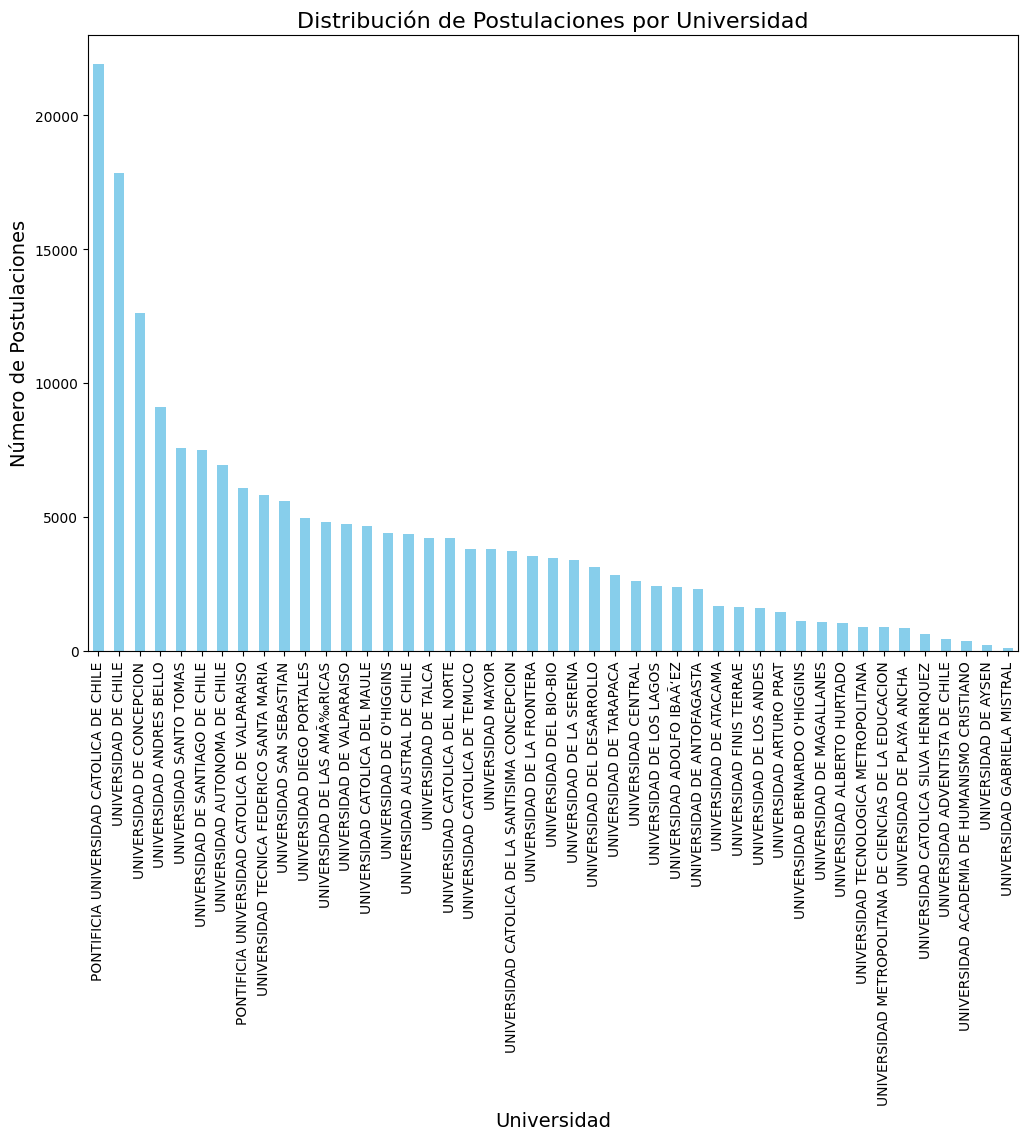

In [6]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
NEMxCarrera = pd.merge(datosUnidos_filtrado,archCodeDelta_Hoja3 , left_on="COD_CARRERA_PREF", right_on="CODIGO_CARRERA", how="left")
columnasNecesarias = ["ID_aux","NOMBRE_UNIVERSIDAD", "PTJE_NEM", "NOMBRE_CARRERA"]
todasLasUniversidades = NEMxCarrera["NOMBRE_UNIVERSIDAD"].unique().tolist()
distribucion_postulaciones = NEMxCarrera['NOMBRE_UNIVERSIDAD'].value_counts()



plt.figure(figsize=(12, 8))  # Tamaño del gráfico
distribucion_postulaciones.plot(kind='bar', color='skyblue')  # Gráfico de barras
plt.title('Distribución de Postulaciones por Universidad', fontsize=16)
plt.xlabel('Universidad', fontsize=14)
plt.ylabel('Número de Postulaciones', fontsize=14)
plt.xticks(rotation=90)  # Gira las etiquetas de las universidades para que no se superpongan
plt.show()


#### Variable Ordinal


Análisis del atributo: SITUACION_EGRESO_y
SITUACION_EGRESO_y
1    209315
5     99100
6      1092
2       855
8       626
7        59
3        24
4        13
Name: count, dtype: int64


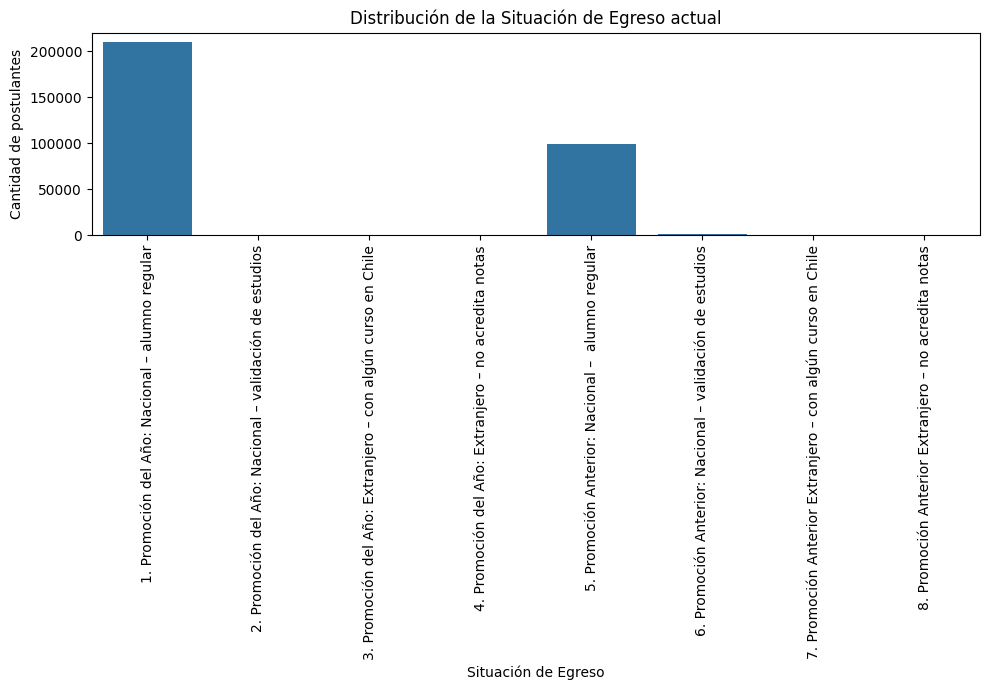

In [7]:
atributo_ordinal = 'SITUACION_EGRESO_y' 
print(f"\nAnálisis del atributo: {atributo_ordinal}")
print(datosUnidos_filtrado[atributo_ordinal].value_counts())
mapeo_situacion = {
    1: "1. Promoción del Año: Nacional – alumno regular",
    2: "2. Promoción del Año: Nacional – validación de estudios",
    3: "3. Promoción del Año: Extranjero – con algún curso en Chile",
    4: "4. Promoción del Año: Extranjero – no acredita notas",
    5: "5. Promoción Anterior: Nacional –  alumno regular",
    6: "6. Promoción Anterior: Nacional – validación de estudios",
    7: "7. Promoción Anterior Extranjero – con algún curso en Chile",
    8: "8. Promoción Anterior Extranjero – no acredita notas",
}

datosUnidos_filtrado['SITUACION_EGRESO_y'] = pd.to_numeric(datosUnidos_filtrado['SITUACION_EGRESO_y']).astype('Int64')

# 3. Gráfico pero usando el mapeo en el eje
plt.figure(figsize=(10,7))
sns.countplot(x='SITUACION_EGRESO_y',  data=datosUnidos_filtrado, order=sorted(mapeo_situacion.keys()))
plt.xticks(ticks=range(len(mapeo_situacion)), labels=[mapeo_situacion[k] for k in sorted(mapeo_situacion.keys())], rotation=90)
plt.xlabel("Situación de Egreso")
plt.ylabel("Cantidad de postulantes")
plt.title("Distribución de la Situación de Egreso actual")
plt.tight_layout()


# Actividad 2

## Analisis de Datos

* Primer Dato: "PTJE_NEM".
  
     Es el Puntaje de Notas de Enseñanza Media. Se usa directamente en los análisis de rendimiento académico, clustering, y segmentaciones.                 Un valor nulo o fuera de rango podría afectar seriamente la calidad del agrupamiento.



* Segundo Dato: "PTJE_RANKING".

    Es el Puntaje de Ranking Escolar. Complementa al NEM, mide el desempeño relativo dentro del colegio. También es muy importante para                    clasificación y agrupamientos. Un valor nulo o atípico afectaría interpretaciones



* Tercer Dato: "ORDEN_PREF".

    Indica el orden de preferencia de las postulaciones del postulante. Es fundamental para definir cuál carrera fue más importante para el alumno. Si     este dato es erróneo o está mal tipeado, distorsionaría todo el análisis de postulaciones prioritarias.


* Cuarto Dato: "COD_CARRERA_PREF".

    Es el código de carrera a la que postula cada alumno. Es vital para las reglas de asociación (una de las actividades obligatorias del taller). Si      faltan códigos, no podrías relacionar carreras correctamente en la fase de extracción de reglas.
          

**Eliminación de valores nulos críticos:** registros sin `PTJE_NEM` fueron eliminados, ya que la ausencia de este puntaje impide análisis válidos.

Se evalua si hay que eliminar valores nem = a 0 (si hay postulantes con nem = 0 y que el puntaje de sus pruebas sean 0, se deberian eliminar)

In [8]:
# Evaluar nulos
print("Valores nulos en PTJE_NEM:", datosUnidos_filtrado['PTJE_NEM'].isnull().sum())

# Eliminar registros sin PTJE_NEM
datosUnidos_filtrado = datosUnidos_filtrado.dropna(subset=['PTJE_NEM'])

Valores nulos en PTJE_NEM: 0


**Conversión de tipos de datos:** se corrigieron columnas como `ORDEN_PREF` para asegurar que fueran enteros y no floats.

In [9]:
# Corregir tipo de dato
datosUnidos_filtrado['ORDEN_PREF'] = pd.to_numeric(datosUnidos_filtrado['ORDEN_PREF'], errors='coerce').astype('Int64')

# Verificación
print(datosUnidos_filtrado['ORDEN_PREF'].dtypes)

Int64


**Filtrado de outliers:** se detectaron puntajes extremos en `PTJE_RANKING` y se filtraron con percentiles.

In [10]:
# Detectar límites
q1 = datosUnidos_filtrado['PTJE_RANKING'].quantile(0.01)
q99 = datosUnidos_filtrado['PTJE_RANKING'].quantile(0.99)

# Filtrar datos dentro del rango
datosUnidos_filtrado = datosUnidos_filtrado[(datosUnidos_filtrado['PTJE_RANKING'] >= q1) & (datosUnidos_filtrado['PTJE_RANKING'] <= q99)]

# Verificación
print(datosUnidos_filtrado['PTJE_RANKING'].describe())

count    311084.000000
mean        706.133813
std         185.019537
min           0.000000
25%         594.000000
50%         718.000000
75%         844.000000
max        1000.000000
Name: PTJE_RANKING, dtype: float64


**Imputación categórica:** valores faltantes en `COD_CARRERA_PREF` se reemplazaron por `"Sin carrera"`, lo cual evita perder registros en el análisis de reglas de asociación.

In [11]:
# Ver cuántos valores faltan en COD_CARRERA_PREF
print("Valores nulos antes:", datosUnidos_filtrado['COD_CARRERA_PREF'].isnull().sum())

# Imputar con una categoría genérica
datosUnidos_filtrado['COD_CARRERA_PREF'].fillna('Sin carrera', inplace=True)

# Verificar que ya no haya nulos
print("Valores nulos después:", datosUnidos_filtrado['COD_CARRERA_PREF'].isnull().sum())

Valores nulos antes: 122115
Valores nulos después: 0


C:\Users\Snipe\AppData\Local\Temp\ipykernel_7740\535109284.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datosUnidos_filtrado['COD_CARRERA_PREF'].fillna('Sin carrera', inplace=True)
C:\Users\Snipe\AppData\Local\Temp\ipykernel_7740\535109284.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sin carrera' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  datosUnidos_filtrado['COD_CARRERA_PREF'].filln

# Actividad 3
Se aplicaron dos algoritmos de clustering con dos configuraciones distintas cada uno:

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

columnas_cluster = ['PTJE_NEM', 'PTJE_RANKING']
datos = datosUnidos_filtrado[columnas_cluster].dropna()
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(datos)

### Algoritmo 1 (KMeans)

#### Configuración 1: KMeans sin PCA (3 clusters):
Agrupó a los postulantes en 3 clusters según `PTJE_NEM` y `PTJE_RANKING`. Se observó una buena separación general.

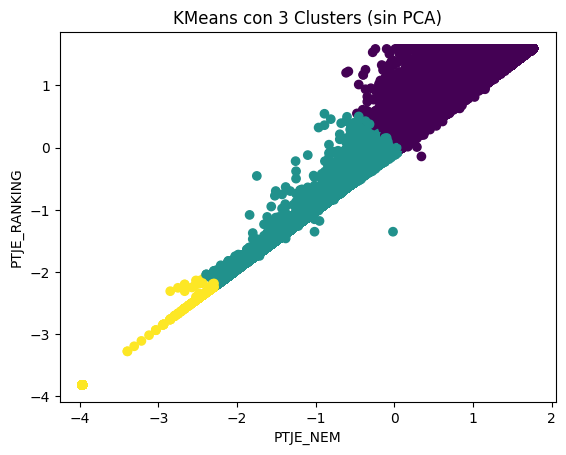

In [16]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_k3 = kmeans_3.fit_predict(datos_escalados)

# Visualización (usamos solo las dos primeras columnas directamente)
plt.scatter(datos_escalados[:, 0], datos_escalados[:, 1], c=labels_k3, cmap='viridis')
plt.title("KMeans con 3 Clusters (sin PCA)")
plt.xlabel(columnas_cluster[0]); plt.ylabel(columnas_cluster[1])
plt.show()

#### Configuración 2 (con PCA): 
Se redujo la dimensionalidad para visualizar y agrupar en 5 clusters. Aunque la visualización fue más clara, algunos clusters quedaron más solapados.

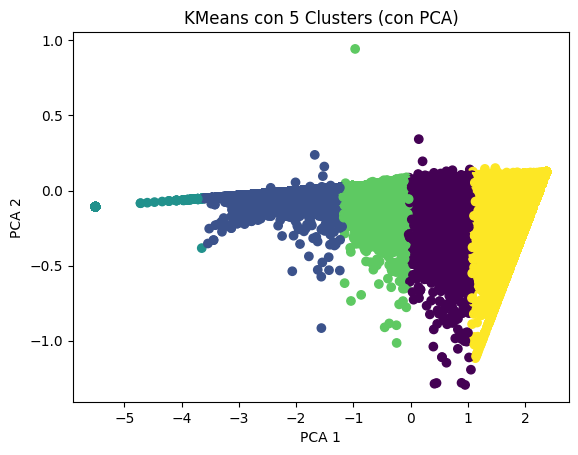

In [13]:
pca_kmeans = PCA(n_components=2)
datos_pca_kmeans = pca_kmeans.fit_transform(datos_escalados)

kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels_k5 = kmeans_5.fit_predict(datos_pca_kmeans)

plt.scatter(datos_pca_kmeans[:, 0], datos_pca_kmeans[:, 1], c=labels_k5, cmap='viridis')
plt.title("KMeans con 5 Clusters (con PCA)")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.show()

### Algoritmo 2 (DBSCAN)

##### Se lleva a cabo una reducción de la cantidad de datos para no saturar la memoria 

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.utils import resample

datos_muestra = resample(datos_escalados, n_samples=int(len(datos_escalados) * 0.15), random_state=42)

#### Configuración 1: DBSCAN sin PCA (eps=0.5):
Aplicado a una muestra del 10% del dataset con `eps=0.5`, detectó algunos clusters densos y muchos puntos de ruido (label = -1).

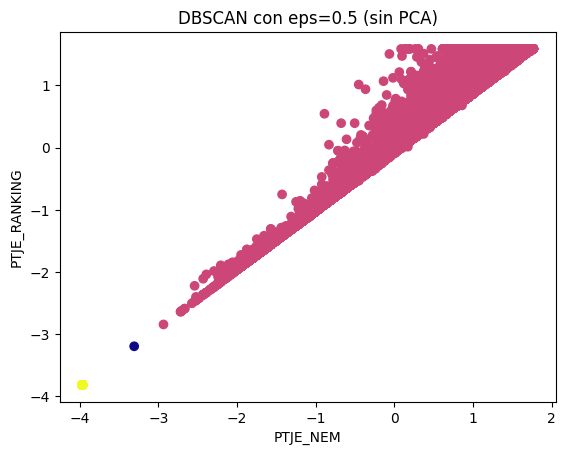

In [21]:
dbscan_05 = DBSCAN(eps=0.5, min_samples=5)
labels_db05 = dbscan_05.fit_predict(datos_muestra)

plt.scatter(datos_muestra[:, 0], datos_muestra[:, 1], c=labels_db05, cmap='plasma')
plt.title("DBSCAN con eps=0.5 (sin PCA)")
plt.xlabel(columnas_cluster[0]); plt.ylabel(columnas_cluster[1])
plt.show()

#### Configuración 2: DBSCAN con PCA (eps=1.0):
Con `eps=1.0`, DBSCAN formó agrupamientos más amplios y menos puntos de ruido, aunque con menor precisión.


**Observación adicional:**  
En esta configuración, DBSCAN agrupó la mayoría de los puntos en un solo cluster (o como ruido), lo cual indica que `eps=1.0` puede ser demasiado amplio para distinguir agrupaciones relevantes en este conjunto reducido.

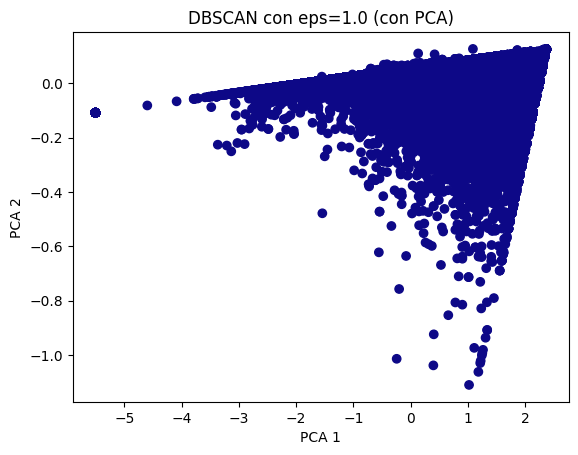

In [22]:
pca_dbscan = PCA(n_components=2)
datos_pca_muestra = pca_dbscan.fit_transform(datos_muestra)

dbscan_10 = DBSCAN(eps=1.0, min_samples=5)
labels_db10 = dbscan_10.fit_predict(datos_pca_muestra)

plt.scatter(datos_pca_muestra[:, 0], datos_pca_muestra[:, 1], c=labels_db10, cmap='plasma')
plt.title("DBSCAN con eps=1.0 (con PCA)")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.show()


El uso de PCA en las segundas configuraciones permitió observar visualmente la estructura de los clusters, destacando su utilidad para interpretabilidad sin modificar los resultados del algoritmo.

> Los resultados muestran que KMeans es más útil para segmentar perfiles generales, mientras que DBSCAN identifica agrupaciones densas y outliers.

# Actividad 4
Se construyó una matriz de postulaciones donde cada `ID_aux` representa un postulante y sus preferencias se transformaron en una lista de carreras y universidades asociadas.

- Se utilizó el algoritmo **Apriori** para generar reglas de asociación.
- Se filtraron las reglas por métricas como `support`, `confidence` y `lift`.
- Se generaron más de 5 reglas válidas del tipo:  
  **{Carrera/Universidad A} ⇒ {Carrera/Universidad B}**

Entre los resultados, se detectaron relaciones frecuentes entre carreras similares o instituciones que tienden a ser postuladas en conjunto.  
Se evitó incluir reglas triviales como comuna ⇒ región, y se justificó la relevancia de las asociaciones encontradas.

Esto permite identificar patrones de postulación que pueden servir a instituciones para entender preferencias cruzadas.

In [ ]:



datosUnidos_filtrado2 = datosUnidos_filtrado
datosUnidos_filtrado2 = datosUnidos_filtrado2[(datosUnidos_filtrado2['PTJE_NEM'] == 0)] #solo los valores 0

columnasNecesarias = ["ID_aux","FECHA_NACIMIENTO" ,"MATE1_REG_ACTUAL", "MATE2_REG_ACTUAL", "HCSOC_REG_ACTUAL", "CIEN_REG_ACTUAL", "MODULO_REG_ACTUAL",
                      "CLEC_INV_ACTUAL", "MATE1_INV_ACTUAL", "MATE2_INV_ACTUAL", "HCSOC_INV_ACTUAL","CIEN_INV_ACTUAL","MODULO_INV_ACTUAL", "CLEC_REG_ANTERIOR", "MATE1_REG_ANTERIOR",
                      "MATE2_REG_ANTERIOR", "HCSOC_REG_ANTERIOR", "CIEN_REG_ANTERIOR", "CLEC_INV_ANTERIOR",  "MATE1_INV_ANTERIOR", "MATE2_INV_ANTERIOR","HCSOC_INV_ANTERIOR","CIEN_INV_ANTERIOR",
                         ]

# Creamos una lista sin 'FECHA_NACIMIENTO'
columnas_sin_fecha = [col for col in columnasNecesarias if col != "FECHA_NACIMIENTO"]

# Aplicamos el filtro
filtro = (datosUnidos_filtrado2[columnas_sin_fecha] == 0).all(axis=1) #filtro para que me almacene solo los postulantes que sus pruebas sean 0

# Filtramos las filas
datos_filtrados3 = datosUnidos_filtrado2[filtro]
print("numero de postulantes con nem = 0 que no han rendido ninguna prueba: ", len(datos_filtrados3) , 
      "\nnumero de postulantes con nem = 0  que almenos hayan rendido 1 prueba: ", len(datosUnidos_filtrado2) - len(datos_filtrados3)) #si se eliminan se perderia informacion de las pruebas


repeticiones_df = datosUnidos_filtrado2["ID_aux"].value_counts().reset_index()
repeticiones_df.columns = ["ID_aux", "Repeticiones"]

# Filtrar los que se repiten 2 veces o más
repetidos = repeticiones_df[repeticiones_df["Repeticiones"] >= 2]
print(repetidos) # si esta vacio es que no hay repiticiones de id en el dataset


numero de postulantes con nem = 0 que no han rendido ninguna prueba:  0 
numero de postulantes con nem = 0  que almenos hayan rendido 1 prueba:  5565
Empty DataFrame
Columns: [ID_aux, Repeticiones]
Index: []


Al demostrar que existen postulantes con nem = 0 pero estos poseen un puntaje mayores a 0 en sus pruebas, al eliminarlos podria afectar a la informacion y medidas de dispercion de las pruebas